In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
neurons = pd.read_csv('/Users/SydneyWalker/Downloads/neurons.csv.gz')
connections = pd.read_csv('/Users/SydneyWalker/Downloads/connections.csv.gz')
sugar_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/sugar_neurons.csv').query("side == 'left'")
bitter_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/bitter_neurons.csv').query("side == 'left'")
water_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/water_neurons.csv').query("side == 'left'")[['root_id','label','output_synapses']]
lowsalt_neurons = pd.read_csv('/Users/SydneyWalker/Downloads/lowsalt_neurons.csv').query("side == 'left'")[['root_id','label','output_synapses']]

In [3]:
connections['nt_type'].unique()

array(['ACH', 'GLUT', 'GABA', 'OCT', 'DA', 'SER'], dtype=object)

In [4]:
sugar_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/sugar_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses']]
bitter_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/bitter_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses']]
water_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/water_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses']]
lowsalt_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/lowsalt_downstream.csv')[['root_id','label','input_synapses']]

In [5]:
# def second_order(neurons_dataset, connecitons_dataset, taste_nuerons):
#     merge = pd.merge(taste_nuerons[['root_id','label']], connections[['pre_root_id','post_root_id','neuropil','syn_count']], left_on = 'root_id', right_on = 'pre_root_id', how = 'inner').query("syn_count >=5")
#     merge = merge.drop(columns = 'pre_root_id')
#     merge = merge.rename(columns={'post_root_id':'second_order_cell_id','label':'GRN_cell_label','root_id':'GRN_cell_id'})
#     return merge

In [6]:
# sugar_downstream = second_order(neurons, connections, sugar_neurons)
# len(pd.unique(sugar_downstream['second_order_cell_id']))

In [7]:
# sugar_downstream = pd.read_csv('/Users/SydneyWalker/Downloads/sugar_downstream.csv').query("side == 'left'")[['root_id','label','input_synapses']]

In [8]:
results = connections.groupby(['pre_root_id', 'post_root_id','neuropil'])['syn_count'].sum().reset_index()

In [9]:
# len(connections['post_root_id'].unique())

In [10]:
# filter = connections[connections['pre_root_id'].isin(sugar_neurons['root_id'])]
# filter.groupby('post_root_id')['syn_count']

In [11]:
# sugar_neurons[sugar_neurons['root_id'].str.contains("labial")]

In [12]:
# results[results['pre_root_id'].isin(sugar_neurons['root_id'])]


In [13]:
# results[results['post_root_id'].isin(sugar_downstream['root_id'])] 
# filter

In [14]:
# def shiu(result, taste_neurons, neuron_downstream, name):
#     figure = pd.DataFrame(columns = ['sugar_GRN', 'downstream_connections'])
#     unique_values = taste_neurons['root_id'].unique()
#     for entry in unique_values:
#         if results['post_root_id'] in sugar_downstream:
            


In [15]:
def third_order(neuron_data, connection_dataset,taste_neurons):
    for entry in neuron_data['second_order_cell_ID']:
        if entry in sugar_neurons['root_id']:
            pass
        else:
            merge = pd.merge(neuron_data[['second_order_cell_ID','label']], connections, left_on='second_order_cell_ID', right_on='pre_root_id', how = 'inner').query("syn_count >=5")
        merge = merge.drop(columns = 'pre_root_id')
        merge = merge.rename(columns={'post_root_id':'third_order_cell_ID','label':'second_order_cell_label'})
        def projection(neuropil):
            if neuropil == 'GNG':
                return 'local'
            else: 
                return 'outside SEZ'
        merge['location_of_connection'] = merge['neuropil'].apply(projection)
        return merge

In [16]:
def function(result, taste_neurons, neuron_downstream, name):
    merge = pd.merge(result, taste_neurons['root_id'], left_on = 'pre_root_id', right_on = 'root_id', how = 'inner')
    merge = merge.drop(columns='root_id')
    merge2 = pd.merge(merge, neuron_downstream, left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
    connections = merge2.groupby('post_root_id')['syn_count'].sum().reset_index()
    labels = pd.merge(connections, neuron_downstream,left_on = 'post_root_id', right_on = 'root_id', how = 'inner')
    labels = labels.drop(columns = 'root_id')
    labels.rename(columns={'input_synapses': 'total_#_input_synapses','syn_count':'#_input_' + name + '_synapses','post_root_id':'second_order_cell_ID'}, inplace=True)
    labels['% input from ' + name + ' GRNs'] = labels['#_input_' + name + '_synapses'] / labels['total_#_input_synapses'] * 100
    labels = labels.sort_values(by = '% input from ' + name + ' GRNs', ascending = False)
    return labels

In [17]:
sugar_data = function(results, sugar_neurons, sugar_downstream, "sugar")
bitter_data = function(results, bitter_neurons, bitter_downstream, "bitter")
water_data = function(results, water_neurons, water_downstream, "water")
lowsalt_data = function(results, lowsalt_neurons, lowsalt_downstream, "lowsalt")

In [19]:
sugar_third_order = third_order(sugar_data, connections, sugar_neurons)
bitter_third_order = third_order(bitter_data, connections, bitter_neurons)
water_third_order = third_order(water_data, connections, water_neurons)
lowsalt_third_order = third_order(lowsalt_data, connections, lowsalt_neurons)

In [20]:
sugar_3N = pd.DataFrame(sugar_third_order['third_order_cell_ID'].sort_values().value_counts())
bitter_3N = pd.DataFrame(bitter_third_order['third_order_cell_ID'].sort_values().value_counts())
water_3N = pd.DataFrame(water_third_order['third_order_cell_ID'].sort_values().value_counts())
lowsalt_3N = pd.DataFrame(lowsalt_third_order['third_order_cell_ID'].sort_values().value_counts())

In [21]:
# len(sugar_third_order[sugar_third_order['third_order_cell_ID'] == 720575940655011489]['second_order_cell_ID'].unique())

def upstream_cells(taste_third_order):
    cells = pd.DataFrame(columns = ['third_order_cell_ID','#_upstream_cells','% input of top NT'])
    unique_values = taste_third_order['third_order_cell_ID'].unique()
    for entry in unique_values:
        x = pd.DataFrame({'third_order_cell_ID' : [entry], '#_upstream_cells' : len(taste_third_order[taste_third_order['third_order_cell_ID'] == entry ]['second_order_cell_ID'].unique()),
        '% input of top NT': max(taste_third_order[taste_third_order['third_order_cell_ID'] == entry]['nt_type'].value_counts())/sum(taste_third_order[taste_third_order['third_order_cell_ID'] == entry]['nt_type'].value_counts())
})
        cells = pd.concat([cells,x])
    return cells      

sugar3N_upstream_cells = upstream_cells(sugar_third_order)
bitter3N_upstream_cells = upstream_cells(bitter_third_order)
water3N_upstream_cells = upstream_cells(water_third_order)
lowsalt3N_upstream_cells = upstream_cells(lowsalt_third_order)


    

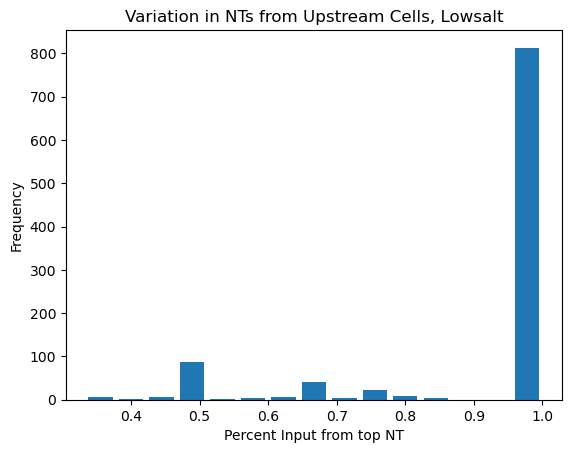

In [22]:
sugar3N_upstream_cells

data = lowsalt3N_upstream_cells['% input of top NT'] 

num_bins = 15
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Percent Input from top NT')
plt.ylabel('Frequency')
plt.title('Variation in NTs from Upstream Cells, Lowsalt')
plt.show()

In [23]:
max(sugar_third_order[sugar_third_order['third_order_cell_ID'] == 720575940655011489]['nt_type'].value_counts())/sum(sugar_third_order[sugar_third_order['third_order_cell_ID'] == 720575940655011489]['nt_type'].value_counts())

# ['second_order_cell_ID'].unique())


0.6

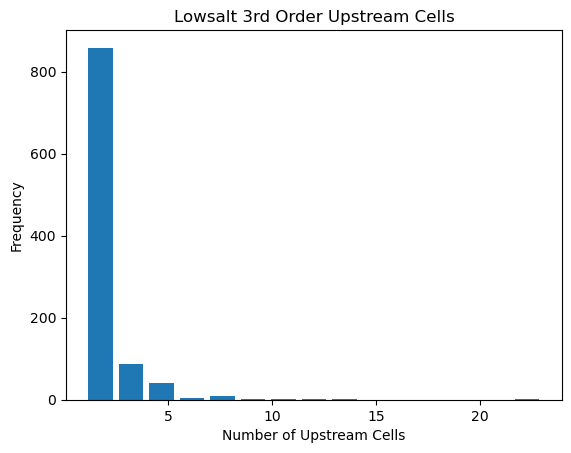

In [24]:
data = lowsalt3N_upstream_cells['#_upstream_cells'] 


num_bins = 15
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of Upstream Cells')
plt.ylabel('Frequency')
plt.title('Lowsalt 3rd Order Upstream Cells')
plt.show()

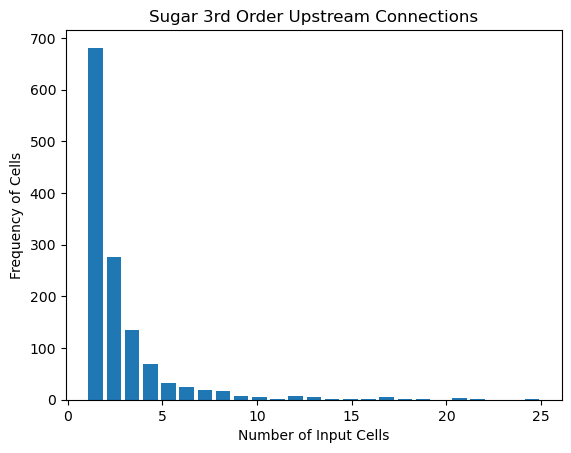

In [25]:
data = sugar_3N['third_order_cell_ID'] 

num_bins = 25
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of Input Cells')
plt.ylabel('Frequency of Cells')
plt.title('Sugar 3rd Order Upstream Connections')
plt.show()

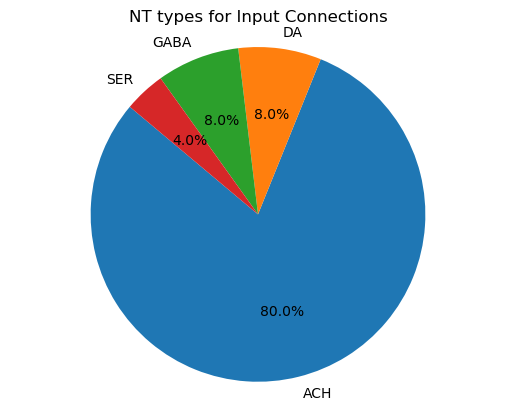

In [26]:
top_sugar = sugar_third_order[sugar_third_order['third_order_cell_ID'] == 720575940619973712]
labels = ['ACH','DA','GABA','SER']
sizes = [len(top_sugar[top_sugar['nt_type'] == 'ACH']), len(top_sugar[top_sugar['nt_type'] == 'DA']), len(top_sugar[top_sugar['nt_type'] == 'GABA']), len(top_sugar[top_sugar['nt_type'] == 'SER'])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('NT types for Input Connections')
plt.axis('equal')
plt.show()

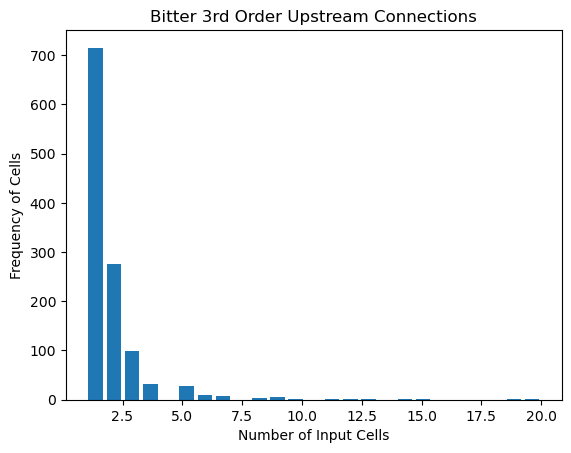

In [27]:
data = bitter_3N['third_order_cell_ID'] 

num_bins = 25
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of Input Cells')
plt.ylabel('Frequency of Cells')
plt.title('Bitter 3rd Order Upstream Connections')
plt.show()

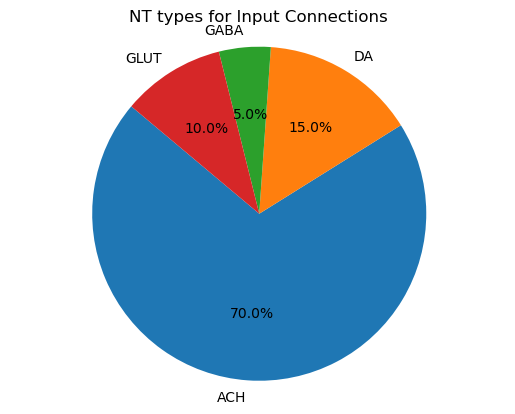

In [28]:
top_bitter = bitter_third_order[bitter_third_order['third_order_cell_ID'] == 720575940614635175]
labels = ['ACH','DA','GABA','GLUT']
sizes = [len(top_bitter[top_bitter['nt_type'] == 'ACH']), len(top_bitter[top_bitter['nt_type'] == 'DA']), len(top_bitter[top_bitter['nt_type'] == 'GABA']), len(top_bitter[top_bitter['nt_type'] == 'GLUT'])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('NT types for Input Connections')
plt.axis('equal')
plt.show()

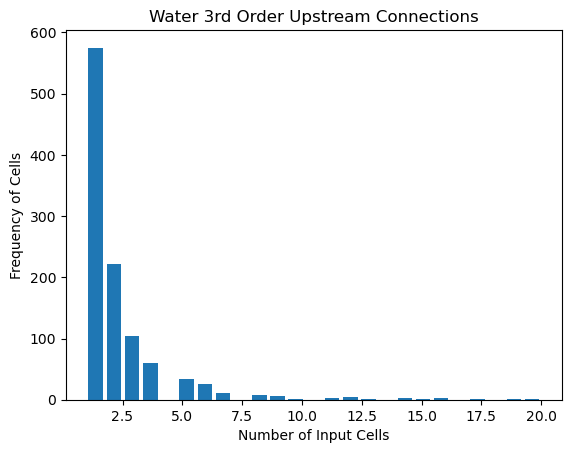

In [29]:
data = water_3N['third_order_cell_ID'] 

num_bins = 25
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of Input Cells')
plt.ylabel('Frequency of Cells')
plt.title('Water 3rd Order Upstream Connections')
plt.show()

In [30]:
water_third_order[water_third_order['third_order_cell_ID'] == 720575940655014049]

,second_order_cell_ID,second_order_cell_label,third_order_cell_ID,neuropil,syn_count,nt_type,location_of_connection
17,720575940622486922,['labial GRN'; 'gustatory receptor neuron/GRN?'],720575940655014049,GNG,12,ACH,local
44,720575940612579053,['gustatory receptor neuron/GRN?'],720575940655014049,GNG,10,ACH,local
64,720575940612950568,[],720575940655014049,GNG,11,ACH,local
202,720575940635172191,['taste sensory (gustatory) neurons'],720575940655014049,GNG,13,ACH,local
422,720575940632648612,['Second-order gustatory neuron Usnea (Sterne ...,720575940655014049,GNG,47,GABA,local
565,720575940613996959,['labial GRN'],720575940655014049,GNG,7,DA,local
624,720575940613786774,[],720575940655014049,GNG,13,ACH,local
656,720575940639198653,['Sugar Gustatory Receptor Neuron (GRN); See E...,720575940655014049,GNG,48,ACH,local
665,720575940631898285,[],720575940655014049,GNG,13,ACH,local
694,720575940620900446,['Sugar Gustatory Receptor Neuron (GRN); See E...,720575940655014049,GNG,45,ACH,local


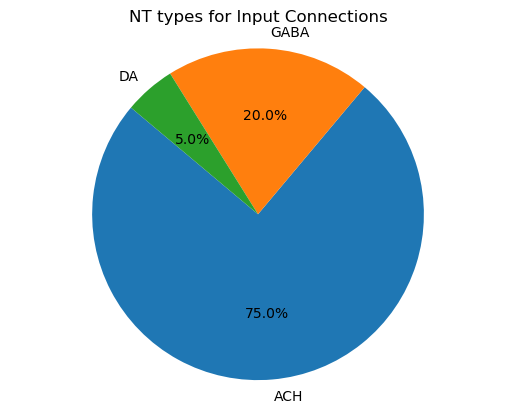

In [31]:
top_water = water_third_order[water_third_order['third_order_cell_ID'] == 720575940655014049]
labels = ['ACH','GABA','DA']
sizes = [len(top_water[top_water['nt_type'] == 'ACH']), len(top_water[top_water['nt_type'] == 'GABA']), len(top_water[top_water['nt_type'] == 'DA'])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('NT types for Input Connections')
plt.axis('equal')
plt.show()

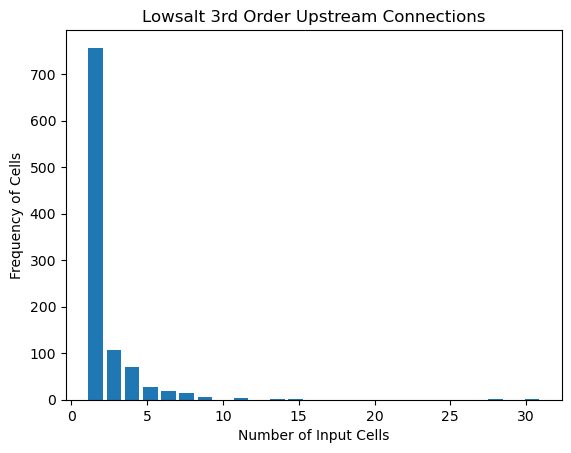

In [32]:
data = lowsalt_3N['third_order_cell_ID'] 

num_bins = 25
bins = np.linspace(min(data), max(data), num_bins + 1)
frequencies, bin_edges = np.histogram(data, bins)
bin_labels = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]
plt.bar(bin_labels, frequencies, width=(max(data) - min(data)) / num_bins * 0.8, align='center')
plt.xlabel('Number of Input Cells')
plt.ylabel('Frequency of Cells')
plt.title('Lowsalt 3rd Order Upstream Connections')
plt.show()

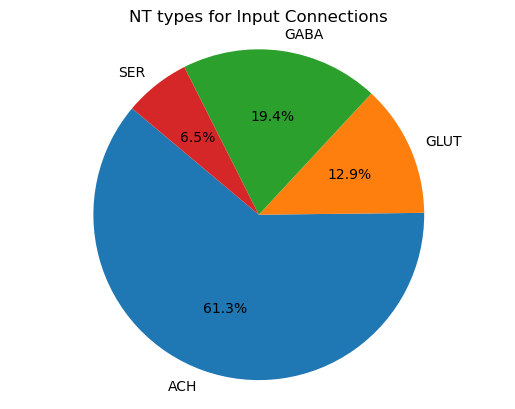

In [33]:
lowsalt_third_order[lowsalt_third_order['third_order_cell_ID'] == 720575940620553094]

top_lowsalt = lowsalt_third_order[lowsalt_third_order['third_order_cell_ID'] == 720575940620553094]
labels = ['ACH','GLUT','GABA','SER']
sizes = [len(top_lowsalt[top_lowsalt['nt_type'] == 'ACH']), len(top_lowsalt[top_lowsalt['nt_type'] == 'GLUT']), len(top_lowsalt[top_lowsalt['nt_type'] == 'GABA']), len(top_lowsalt[top_lowsalt['nt_type'] == 'SER'])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('NT types for Input Connections')
plt.axis('equal')
plt.show()

In [34]:
def classify(taste_third_order):
    classification = pd.DataFrame(columns = ['second_order_cell_ID', 'projection','#_of_external_projections'])
    unique_values = taste_third_order['second_order_cell_ID'].unique()
    for entry in unique_values:
        if all(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'local'):
            x = pd.DataFrame({'second_order_cell_ID': [entry], 'projection':'local','#_of_external_projections':(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'outside SEZ').sum()})
            classification = pd.concat([classification,x])
        else:
            x = pd.DataFrame({'second_order_cell_ID': [entry], 'projection':'outside SEZ','#_of_external_projections':(taste_third_order[taste_third_order['second_order_cell_ID'] == entry]['location_of_connection'] == 'outside SEZ').sum()})
            classification = pd.concat([classification,x])
    return classification

In [35]:
sugar_second_order_projection = classify(sugar_third_order)
bitter_second_order_projection = classify(bitter_third_order)
water_second_order_projection = classify(water_third_order)
lowsalt_second_order_projection = classify(lowsalt_third_order)

In [36]:
bitter_third_order[bitter_third_order['nt_type'] == 'ACH']['neuropil'].unique()

array(['PRW', 'GNG', 'SLP_L', 'AVLP_L', 'SCL_L', 'PVLP_L', 'MB_PED_L',
       'LH_L', 'AL_L', 'SMP_L', 'MB_CA_L', 'SAD', 'SIP_L', 'FLA_L',
       'SLP_R', 'SIP_R', 'FLA_R'], dtype=object)

In [37]:
sugar_third_order.query("nt_type == 'ACH' and neuropil == 'GNG'")

sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'GNG')]


,second_order_cell_ID,second_order_cell_label,third_order_cell_ID,neuropil,syn_count,nt_type,location_of_connection
2,720575940642361485,[],720575940612648106,GNG,6,ACH,local
3,720575940642361485,[],720575940614763666,GNG,5,ACH,local
4,720575940642361485,[],720575940616103218,GNG,11,ACH,local
5,720575940642361485,[],720575940617593233,GNG,12,ACH,local
6,720575940642361485,[],720575940619973712,GNG,9,ACH,local
...,...,...,...,...,...,...,...
3935,720575940612692633,['unclassified_IN_FW_514'],720575940642428045,GNG,40,ACH,local
3937,720575940612692633,['unclassified_IN_FW_514'],720575940644666148,GNG,8,ACH,local
3939,720575940612692633,['unclassified_IN_FW_514'],720575940647030324,GNG,7,ACH,local
3940,720575940612692633,['unclassified_IN_FW_514'],720575940652580086,GNG,5,ACH,local


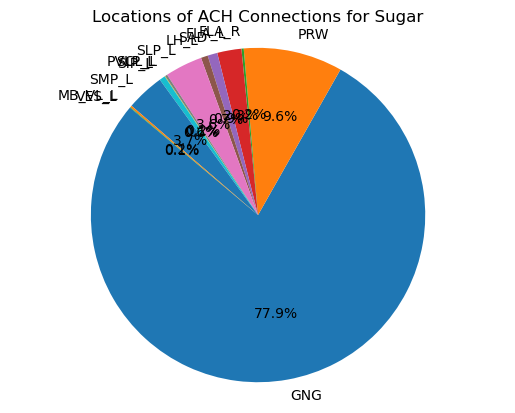

In [38]:
#TEST COME BACK TO HERE
labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 'PVLP_L', 'SIP_L', 'SMP_L', 'MB_VL_L', 'VES_L']
sizes = [len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'GNG')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PRW')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_R')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SAD')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'LH_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SCL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PVLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SIP_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SMP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'MB_VL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'VES_L')])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Locations of ACH Connections for Sugar')
plt.axis('equal')
plt.show()

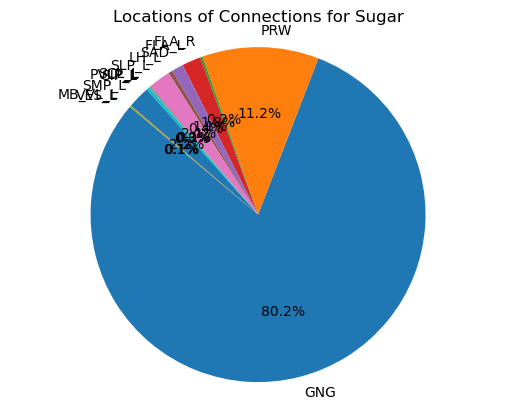

In [39]:
labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 
            'PVLP_L', 'SIP_L', 'SMP_L', 'MB_VL_L', 'VES_L']
sizes = [len(sugar_third_order[sugar_third_order['neuropil'] == 'GNG']),len(sugar_third_order[sugar_third_order['neuropil'] == 'PRW']),len(sugar_third_order[sugar_third_order['neuropil'] == 'FLA_R']),
len(sugar_third_order[sugar_third_order['neuropil'] == 'FLA_L']),len(sugar_third_order[sugar_third_order['neuropil'] == 'SAD']),len(sugar_third_order[sugar_third_order['neuropil'] == 'LH_L']),
len(sugar_third_order[sugar_third_order['neuropil'] == 'SLP_L']),len(sugar_third_order[sugar_third_order['neuropil'] == 'SCL_L']),len(sugar_third_order[sugar_third_order['neuropil'] == 'PVLP_L']),
len(sugar_third_order[sugar_third_order['neuropil'] == 'SIP_L']),len(sugar_third_order[sugar_third_order['neuropil'] == 'SMP_L']),len(sugar_third_order[sugar_third_order['neuropil'] == 'MB_VL_L']),
len(sugar_third_order[sugar_third_order['neuropil'] == 'VES_L']),]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Locations of Connections for Sugar')
plt.axis('equal')
plt.show()

In [40]:
bitter_third_order[bitter_third_order['nt_type'] == 'ACH']['neuropil'].unique()

array(['PRW', 'GNG', 'SLP_L', 'AVLP_L', 'SCL_L', 'PVLP_L', 'MB_PED_L',
       'LH_L', 'AL_L', 'SMP_L', 'MB_CA_L', 'SAD', 'SIP_L', 'FLA_L',
       'SLP_R', 'SIP_R', 'FLA_R'], dtype=object)

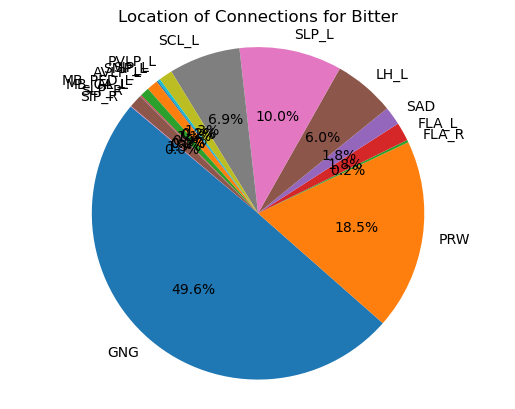

In [41]:
labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 
            'PVLP_L', 'SIP_L', 'SMP_L','AVLP_L','MB_PED_L','AL_L','MB_CA_L','SLP_R','SIP_R']
sizes = [len(bitter_third_order[bitter_third_order['neuropil'] == 'GNG']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PRW']),len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_R']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SAD']),len(bitter_third_order[bitter_third_order['neuropil'] == 'LH_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SLP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SCL_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PVLP_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SIP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SMP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'AVLP_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'MB_PED_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'AL_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'MB_CA_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SLP_R']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SIP_R'])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Location of Connections for Bitter')
plt.axis('equal')
plt.show()


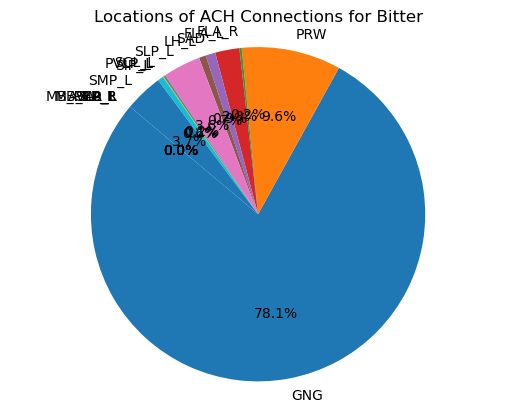

In [42]:
#TEST COME BACK TO HERE
labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 
            'PVLP_L', 'SIP_L', 'SMP_L','AVLP_L','MB_PED_L','AL_L','MB_CA_L','SLP_R','SIP_R']
sizes = [len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'GNG')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PRW')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_R')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SAD')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'LH_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SCL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PVLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SIP_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SMP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'AVLP_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'MB_PED_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'AL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'MB_CA_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_R')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SIP_R')])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Locations of ACH Connections for Bitter')
plt.axis('equal')
plt.show()

In [43]:
water_third_order[water_third_order['nt_type'] == 'ACH']['neuropil'].unique()

array(['GNG', 'PRW', 'MB_CA_L', 'SCL_L', 'LH_L', 'SLP_L', 'AL_L', 'SAD',
       'VES_L', 'PVLP_L', 'PLP_L', 'FLA_R', 'FLA_L'], dtype=object)

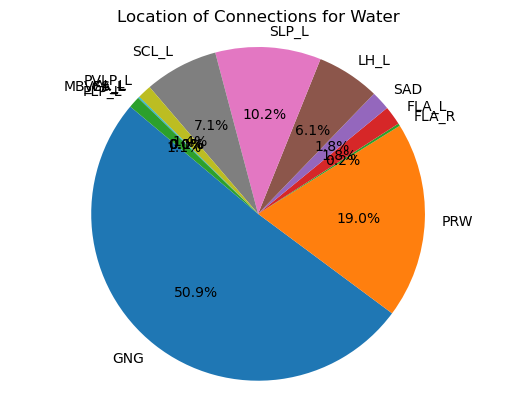

In [44]:
labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 
            'PVLP_L','AL_L','MB_CA_L','VES_L','PLP_L']
sizes = [len(bitter_third_order[bitter_third_order['neuropil'] == 'GNG']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PRW']),len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_R']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SAD']),len(bitter_third_order[bitter_third_order['neuropil'] == 'LH_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SLP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SCL_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PVLP_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'AL_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'MB_CA_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'VES_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PLP_L']),]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Location of Connections for Water')
plt.axis('equal')
plt.show()


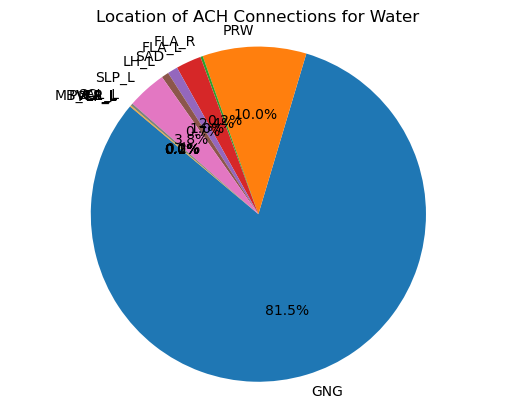

In [45]:
labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L', 'SAD', 'LH_L', 'SLP_L', 'SCL_L', 
            'PVLP_L','AL_L','MB_CA_L','VES_L','PLP_L']
sizes = [len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'GNG')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PRW')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_R')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SAD')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'LH_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SCL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PVLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'AL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'MB_CA_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'VES_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PLP_L')])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Location of ACH Connections for Water')
plt.axis('equal')
plt.show()


In [46]:
(lowsalt_third_order[lowsalt_third_order['nt_type'] == 'ACH']['neuropil'].unique())

array(['SLP_L', 'LH_L', 'LH_R', 'SLP_R', 'GNG', 'VES_L', 'PRW', 'SAD',
       'FLA_R', 'SIP_L', 'SCL_L', 'AVLP_L', 'SMP_L', 'FLA_L'],
      dtype=object)

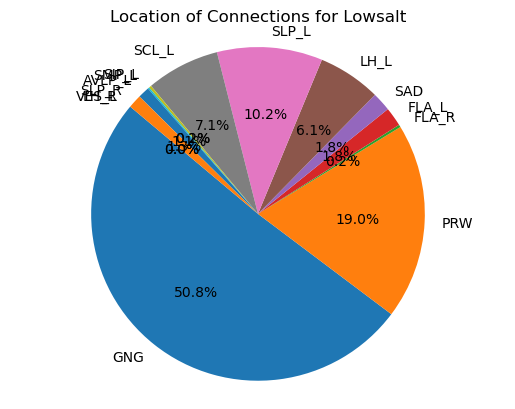

In [47]:
labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L','SAD', 'LH_L', 'SLP_L', 'SCL_L', 
             'SIP_L', 'SMP_L','AVLP_L','SLP_R','LH_R','VES_L']

sizes = [len(bitter_third_order[bitter_third_order['neuropil'] == 'GNG']),len(bitter_third_order[bitter_third_order['neuropil'] == 'PRW']),len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_R']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'FLA_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SAD']),len(bitter_third_order[bitter_third_order['neuropil'] == 'LH_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SLP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SCL_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'SIP_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SMP_L']),len(bitter_third_order[bitter_third_order['neuropil'] == 'AVLP_L']),
len(bitter_third_order[bitter_third_order['neuropil'] == 'SLP_R']),len(bitter_third_order[bitter_third_order['neuropil'] == 'LH_R']),len(bitter_third_order[bitter_third_order['neuropil'] == 'VES_L'])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Location of Connections for Lowsalt')
plt.axis('equal')
plt.show()


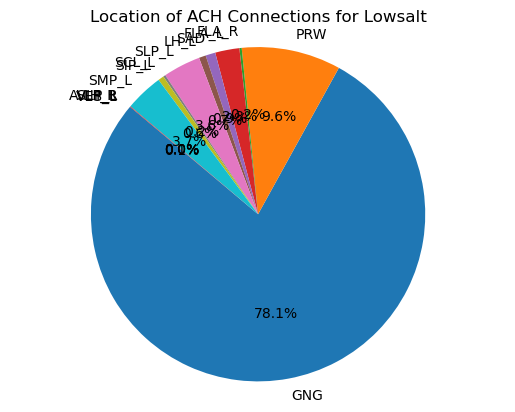

In [48]:
labels = ['GNG', 'PRW', 'FLA_R', 'FLA_L','SAD', 'LH_L', 'SLP_L', 'SCL_L', 
             'SIP_L', 'SMP_L','AVLP_L','SLP_R','LH_R','VES_L']

sizes = [len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'GNG')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'PRW')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_R')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'FLA_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SAD')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'LH_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SCL_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SIP_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SMP_L')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'AVLP_L')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'SLP_R')]),
len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'LH_R')]),len(sugar_third_order[(sugar_third_order['nt_type'] == 'ACH') & (sugar_third_order['neuropil'] == 'VES_L')])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('Location of ACH Connections for Lowsalt')
plt.axis('equal')
plt.show()


In [61]:
def local_NTs(taste_third_order):
    local = taste_third_order[taste_third_order['location_of_connection'] == 'local']
    labels = ['ACH','GLUT','GABA','SER','DA']
    sizes = [len(local[local['nt_type'] == 'ACH']), len(local[local['nt_type'] == 'GLUT']), len(local[local['nt_type'] == 'GABA']), len(local[local['nt_type'] == 'SER']), len(local[local['nt_type'] == 'SER'])]
    plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
    plt.title('NT types for local connections')
    plt.axis('equal')
    plt.show()


In [69]:
len(sugar_third_order)

3071

In [50]:
def nonlocal_NTs(taste_third_order):
    local = taste_third_order[taste_third_order['location_of_connection'] == 'outside SEZ']
    labels = ['ACH','GLUT','GABA','SER','DA']
    sizes = [len(local[local['nt_type'] == 'ACH']), len(local[local['nt_type'] == 'GLUT']), len(local[local['nt_type'] == 'GABA']), len(local[local['nt_type'] == 'SER']), len(local[local['nt_type'] == 'SER'])]
    plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
    plt.title('NT types for non-local connections')
    plt.axis('equal')
    plt.show()




In [77]:
from scipy.stats import chi2_contingency
non_local = water_third_order[water_third_order['location_of_connection'] == 'outside SEZ']
local = water_third_order[water_third_order['location_of_connection'] != 'outside SEZ']
observed = np.array([[len(non_local[non_local['nt_type'] == 'ACH']), len(non_local[non_local['nt_type'] == 'GLUT']) + len(non_local[non_local['nt_type'] == 'GABA'])], [len(local[local['nt_type'] == 'ACH']), len(local[local['nt_type'] == 'GLUT']) + len(local[local['nt_type'] == 'GABA'])]])

# Perform the chi-squared test
chi2_contingency(observed)

Chi2ContingencyResult(statistic=17.88304863830764, pvalue=2.3490414759292273e-05, dof=1, expected_freq=array([[ 378.23240372,  230.76759628],
       [1024.76759628,  625.23240372]]))

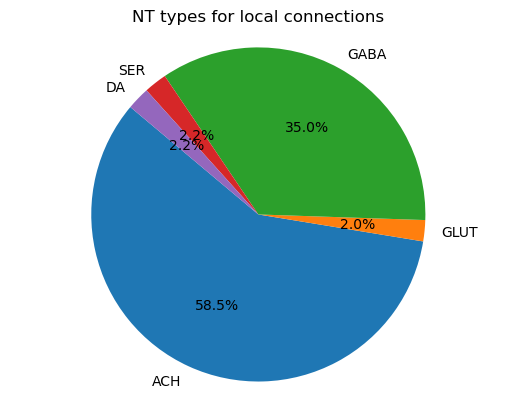

In [71]:
local_NTs(sugar_third_order)

In [52]:
local_sugar = sugar_third_order[sugar_third_order['location_of_connection'] == 'local']
local_sugar

,second_order_cell_ID,second_order_cell_label,third_order_cell_ID,neuropil,syn_count,nt_type,location_of_connection
0,720575940642361485,[],720575940609476562,GNG,7,GLUT,local
1,720575940642361485,[],720575940610788069,GNG,6,GLUT,local
2,720575940642361485,[],720575940612648106,GNG,6,ACH,local
3,720575940642361485,[],720575940614763666,GNG,5,ACH,local
4,720575940642361485,[],720575940616103218,GNG,11,ACH,local
...,...,...,...,...,...,...,...
3937,720575940612692633,['unclassified_IN_FW_514'],720575940644666148,GNG,8,ACH,local
3939,720575940612692633,['unclassified_IN_FW_514'],720575940647030324,GNG,7,ACH,local
3940,720575940612692633,['unclassified_IN_FW_514'],720575940652580086,GNG,5,ACH,local
3944,720575940612692633,['unclassified_IN_FW_514'],720575940660223873,GNG,10,ACH,local


In [53]:
# test = lowsalt_second_order_projection[lowsalt_second_order_projection['#_of_external_projections'] == 0]
# pd.merge(test, sugar_third_order[['second_order_cell_ID','third_order_cell_ID','nt_type','location_of_connection']])

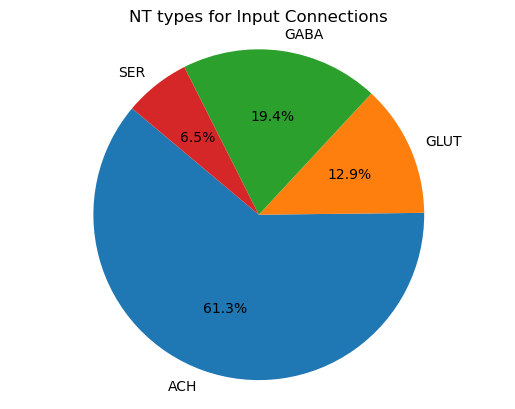

In [54]:
def correlation(taste_second_order_projection, taste_third_order, top_taste):
    labels = ['ACH','GLUT','GABA','SER','DA']
    if taste_second_order_projection[taste_second_order_projection['#_of_external_projections'] == 0]:
        x = plt.merge
    sizes = [len(x[x['nt_type'] == 'ACH']), len(x[x['nt_type'] == 'GLUT']), len(x[x['nt_type'] == 'GABA']), len(x[x['nt_type'] == 'SER']), len(x[x['nt_type'] == 'SER'])]
    plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
    plt.title('NT types for Input Connections')
    plt.axis('equal')
    plt.show()



        




lowsalt_third_order[lowsalt_third_order['third_order_cell_ID'] == 720575940620553094]

top_lowsalt = lowsalt_third_order[lowsalt_third_order['third_order_cell_ID'] == 720575940620553094]
labels = ['ACH','GLUT','GABA','SER']
sizes = [len(top_lowsalt[top_lowsalt['nt_type'] == 'ACH']), len(top_lowsalt[top_lowsalt['nt_type'] == 'GLUT']), len(top_lowsalt[top_lowsalt['nt_type'] == 'GABA']), len(top_lowsalt[top_lowsalt['nt_type'] == 'SER'])]
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=140)
plt.title('NT types for Input Connections')
plt.axis('equal')
plt.show()

In [55]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [56]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [57]:
np.shape(true_labels)

(200,)

In [58]:
print(features[:5])
true_labels[:5]

[[  9.77075874   3.27621022]
 [ -9.71349666  11.27451802]
 [ -6.91330582  -9.34755911]
 [-10.86185913 -10.75063497]
 [ -8.50038027  -4.54370383]]


array([1, 0, 2, 2, 2])

In [59]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

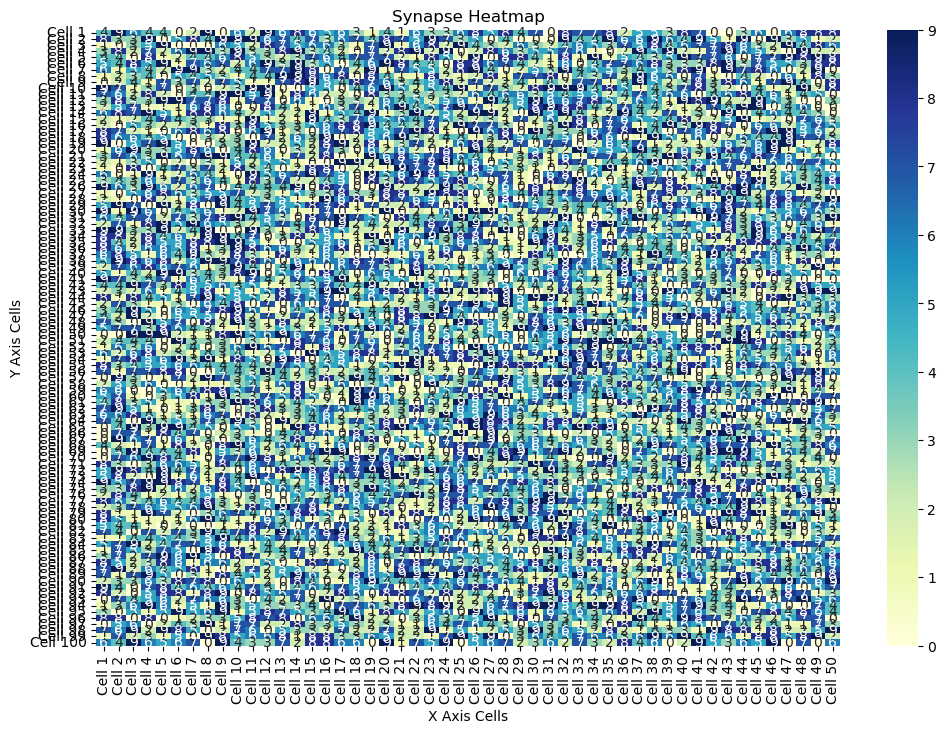

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace this with your actual data)
x_axis_labels = [f'Cell {i}' for i in range(1, 51)]
y_axis_labels = [f'Cell {i}' for i in range(1, 101)]

# Generate synthetic data for illustration
data = np.random.randint(0, 10, size=(100, 50))

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data, cmap="YlGnBu", annot=True, fmt="d", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

# Add labels and title
plt.xlabel('X Axis Cells')
plt.ylabel('Y Axis Cells')
plt.title('Synapse Heatmap')

# Show the plot
plt.show()
